<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




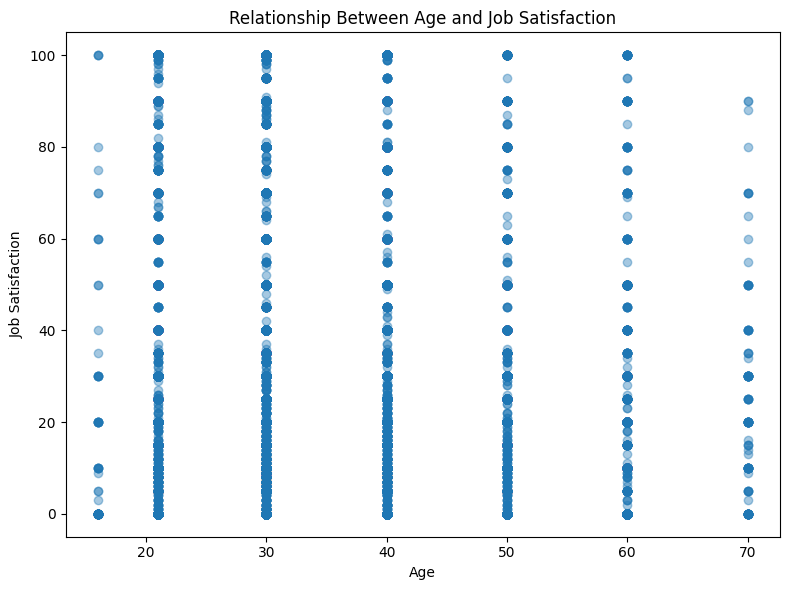

In [3]:
df_age_satis = df[['Age', 'JobSatPoints_6']]

df_age_satis = df_age_satis[df_age_satis['Age'] != 'Prefer not to say']

#convert age ranges
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age_satis['Age_numeric'] = df_age_satis['Age'].map(age_mapping)

df_age_satis = df_age_satis.dropna()

# Create scatterplot
plt.figure(figsize=(8, 6))

plt.scatter(
    df_age_satis['Age_numeric'],
    df_age_satis['JobSatPoints_6'],
    alpha=0.4
)

plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Age and Job Satisfaction')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


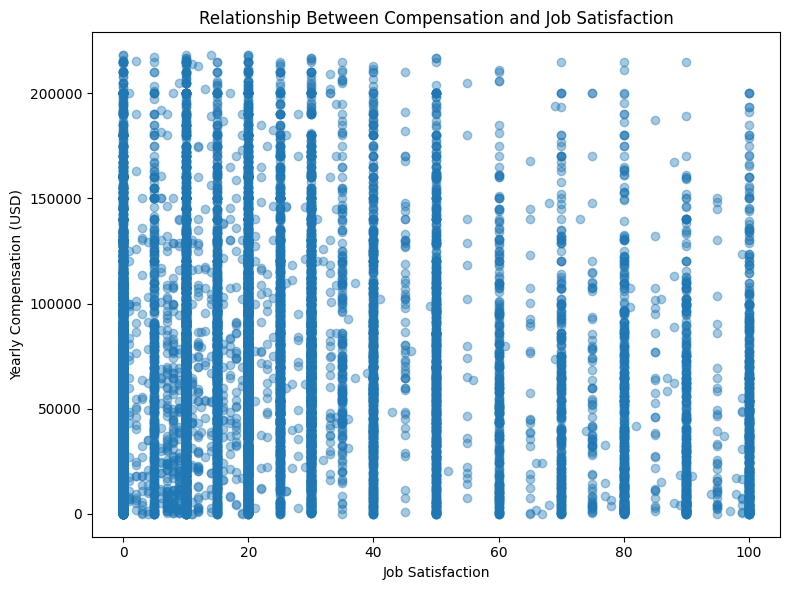

In [4]:
df_satis_conv = df[['ConvertedCompYearly', 'JobSatPoints_6']]
df_satis_conv = df_satis_conv.dropna()

upper = df_satis_conv['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_satis_conv['ConvertedCompYearly'].quantile(0.75) - df_satis_conv['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_satis_conv = df_satis_conv[df_satis_conv['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(
    df_satis_conv['JobSatPoints_6'],
    df_satis_conv['ConvertedCompYearly'],
    alpha=0.4
)
plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Relationship Between Compensation and Job Satisfaction')
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


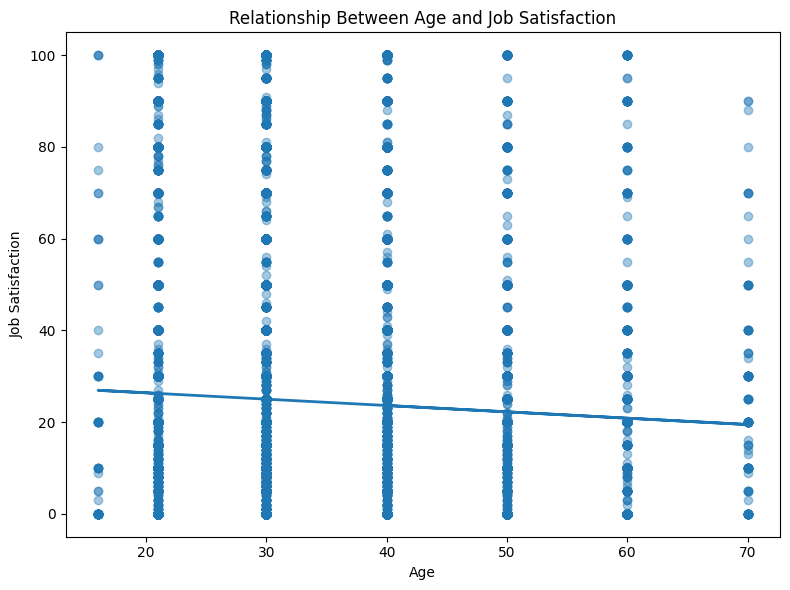

In [5]:
import numpy as np

df_age_satis = df[['Age', 'JobSatPoints_6']]

df_age_satis = df_age_satis[df_age_satis['Age'] != 'Prefer not to say']

#convert age ranges
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age_satis['Age_numeric'] = df_age_satis['Age'].map(age_mapping)

df_age_satis = df_age_satis.dropna()

# Fit linear regression
z = np.polyfit(
    df_age_satis['Age_numeric'],
    df_age_satis['JobSatPoints_6'],
    1
)
p = np.poly1d(z)

# Create scatterplot

plt.figure(figsize=(8, 6))

plt.scatter(
    df_age_satis['Age_numeric'],
    df_age_satis['JobSatPoints_6'],
    alpha=0.4
)

plt.plot(
    df_age_satis['Age_numeric'],
    p(df_age_satis['Age_numeric']),
    linewidth=2
)
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Age and Job Satisfaction')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


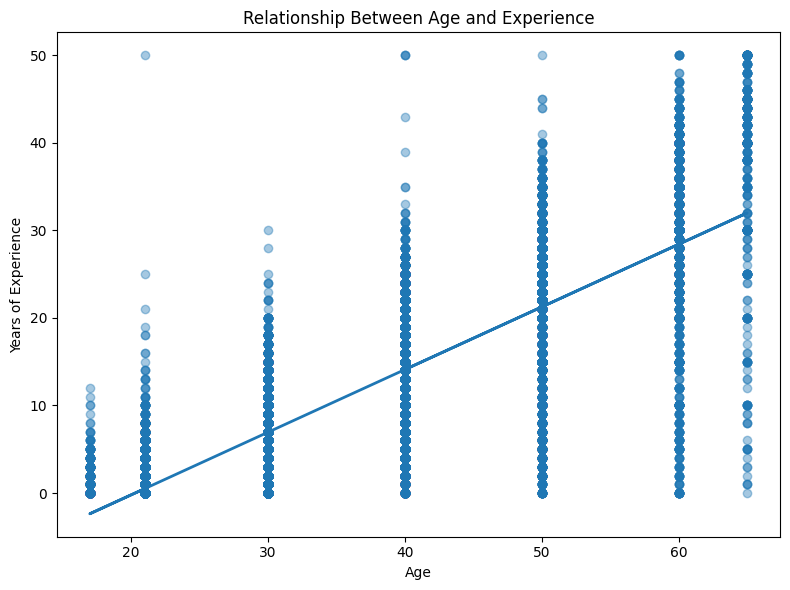

In [6]:
df_age_exp = df[['Age', 'YearsCodePro']]

df_age_exp = df_age_exp[df_age_exp['Age'] != 'Prefer not to say']

# convert age ranges
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}

df_age_exp['Age_numeric'] = df_age_exp['Age'].map(age_mapping)

# rename yearsprocode types
df_age_exp['YearsCodePro'] = df_age_exp['YearsCodePro'].replace({
    'Less than 1 year':
        0,
    'More than 50 years':
        50,
})

df_age_exp = df_age_exp.dropna()

df_age_exp['YearsCodePro'] = pd.to_numeric(
    df_age_exp['YearsCodePro'], errors='coerce'
)

# Fit linear regression
z = np.polyfit(
    df_age_exp['Age_numeric'],
    df_age_exp['YearsCodePro'],
    1
)
p = np.poly1d(z)

# Create scatterplot
plt.figure(figsize=(8, 6))

plt.scatter(
    df_age_exp['Age_numeric'],
    df_age_exp['YearsCodePro'],
    alpha=0.4
)

plt.plot(
    df_age_exp['Age_numeric'],
    p(df_age_exp['Age_numeric']),
    linewidth=2
)
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('Relationship Between Age and Experience')
plt.tight_layout()
plt.show()



### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


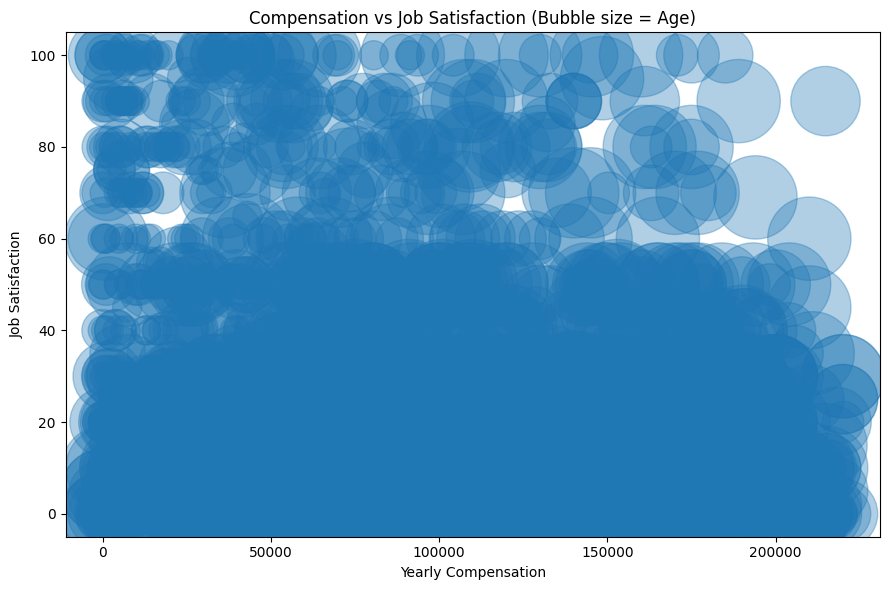

In [7]:
df_age_conv_sat = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']]

df_age_conv_sat = df_age_conv_sat[df_age_conv_sat['Age'] != 'Prefer not to say']

# convert age ranges
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}

df_age_conv_sat['Age_numeric'] = df_age_conv_sat['Age'].map(age_mapping)

upper = df_age_conv_sat['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_age_conv_sat['ConvertedCompYearly'].quantile(0.75) - df_age_conv_sat['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_age_conv_sat = df_age_conv_sat[df_age_conv_sat['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

df_age_conv_sat = df_age_conv_sat.dropna()

# reduce dataset for visibility
df_age_conv_sat = (
    df_age_conv_sat
    .groupby('Age_numeric', group_keys=False)[
        ['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']
    ]
    .apply(lambda x: x.sample(n=min(len(x), 500), random_state=42))
)

df_age_conv_sat

# create bubble plot
bubble_sizes = (df_age_conv_sat['Age_numeric'] ** 2) # square age for differentiation in bubble size

plt.figure(figsize=(9, 6))
plt.scatter(
    df_age_conv_sat['ConvertedCompYearly'],
    df_age_conv_sat['JobSatPoints_6'],
    s=bubble_sizes,
    alpha=0.35
)

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs Job Satisfaction (Bubble size = Age)')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


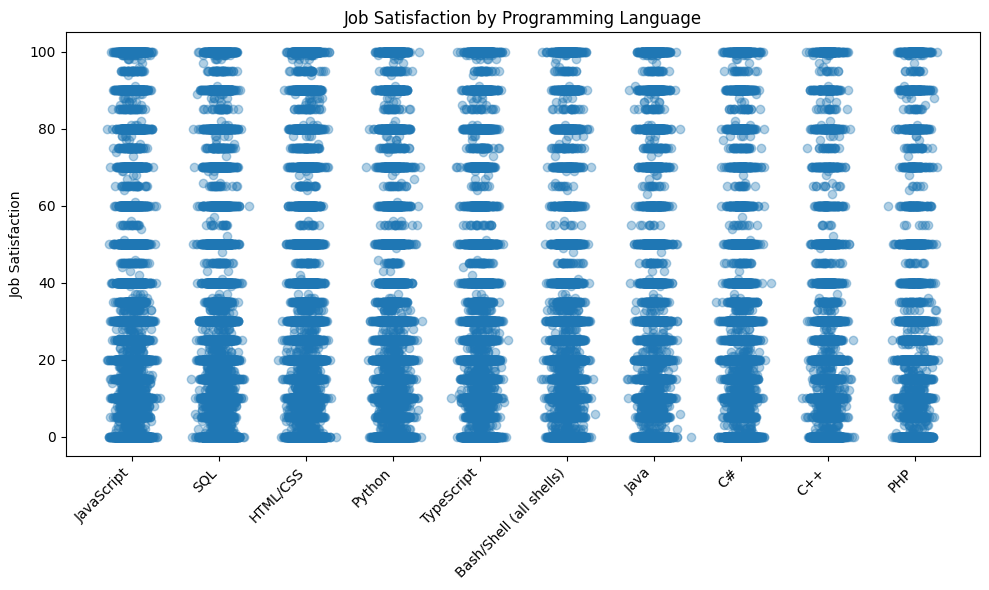

In [8]:
df_lang_sat = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()

df_lang_sat = df_lang_sat.dropna()

# split and explode programming languages
df_lang_sat['Language'] = df_lang_sat['LanguageHaveWorkedWith'].str.split(';')
df_lang_sat = df_lang_sat.explode('Language')

top_languages = (
    df_lang_sat['Language']
    .value_counts()
    .head(10)
    .index
)

df_lang_sat = df_lang_sat[df_lang_sat['Language'].isin(top_languages)] # retain top 10 langugaes

# create numeric code for exploded language
language_codes = {
    lang: i for i, lang in enumerate(top_languages)
}

df_lang_sat['LangCode'] = df_lang_sat['Language'].map(language_codes) # add numeric language code to dataframe

#create scatter plot

sample = np.random.normal(0, 0.08, size=len(df_lang_sat)) # create random sample

plt.figure(figsize=(10, 6))
plt.scatter(
    df_lang_sat['LangCode'] + sample,
    df_lang_sat['JobSatPoints_6'],
    alpha=0.35
)

plt.xticks(
    ticks=range(len(top_languages)),
    labels=top_languages,
    rotation=45,
    ha='right'
)

plt.ylabel('Job Satisfaction')
plt.title('Job Satisfaction by Programming Language')
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


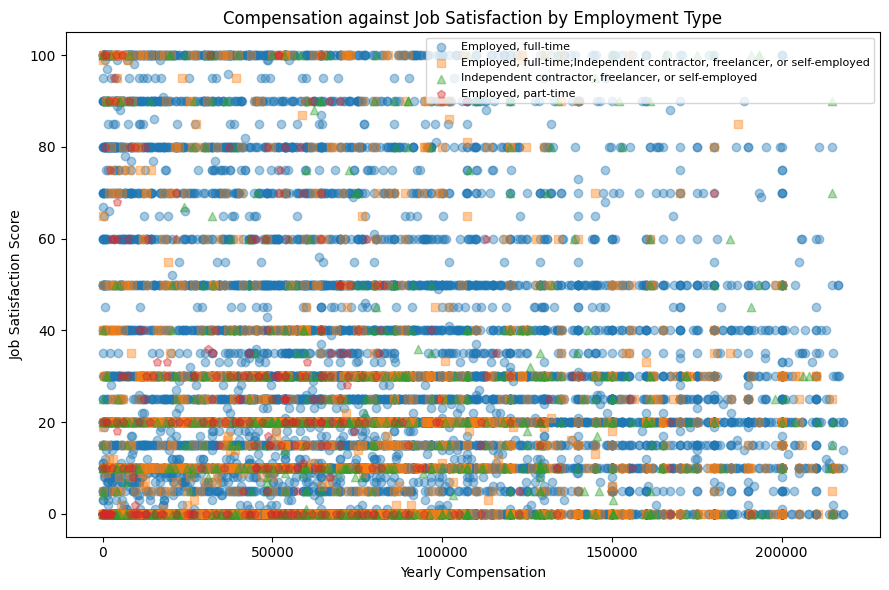

In [9]:
df_emp_satis = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']]

df_emp_satis = df_emp_satis.dropna() # drop nulls

upper = df_emp_satis['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_emp_satis['ConvertedCompYearly'].quantile(0.75) - df_emp_satis['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_emp_satis = df_emp_satis[df_emp_satis['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# filter employment types
top_10_employment = (
    df_emp_satis['Employment']
    .value_counts()
    .head(10)
    .index
)

df_emp_satis = df_emp_satis[df_emp_satis['Employment'].isin(top_10_employment)] # retain only the top 10 employment types

# create scatter
markers = ['o', 's', '^', 'p']

plt.figure(figsize=(9, 6))

for emp, m in zip(top_10_employment, markers):
    subset = df_emp_satis[df_emp_satis['Employment'] == emp]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        alpha=0.4,
        marker=m,
        label=emp
    )

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Score')
plt.title('Compensation against Job Satisfaction by Employment Type')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


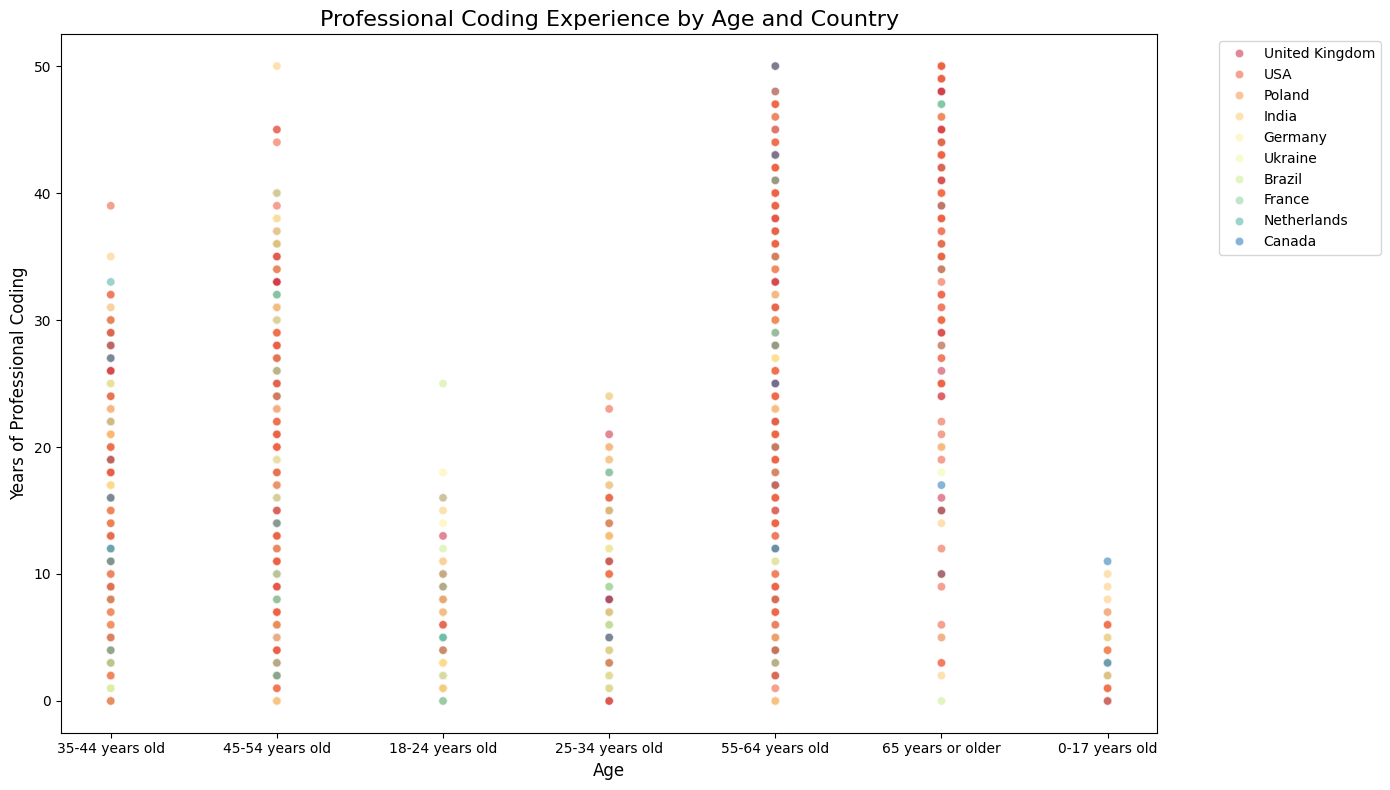

In [10]:
!pip install seaborn

import seaborn as sns

df_exp_age = df[['YearsCodePro', 'Age', 'Country']]

df_exp_age = df_exp_age.dropna() # drop nulls

# rename countries
df_exp_age['Country'] = df_exp_age['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland':
        'United Kingdom',
    'United States of America':
        'USA'
})

# rename age types
df_exp_age['YearsCodePro'] = df_exp_age['YearsCodePro'].replace({
    'Less than 1 year':
        0,
    'More than 50 years':
        50,
})

df_exp_age = df_exp_age[df_exp_age['Age'] != 'Prefer not to say'] # remove age where no answer is given

# rename yearsprocode types
df_exp_age['YearsCodePro'] = df_exp_age['YearsCodePro'].replace({
    'Less than 1 year':
        0,
    'More than 50 years':
        50,
})

df_exp_age['YearsCodePro']=pd.to_numeric(df_exp_age['YearsCodePro'], errors='coerce')

# rename age
df_exp_age['Age'] = df_exp_age['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}

df_exp_age['Age_numeric'] = df_exp_age['Age'].map(age_mapping) # create new column with mapped age

# filter countries
top_10_country = (
    df_exp_age['Country']
    .value_counts()
    .head(10)
    .index
)

df_exp_age = df_exp_age[df_exp_age['Country'].isin(top_10_country)] # retain only the top 10 countries

# create scatter
plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(
    data=df_exp_age,
    x='Age',
    y='YearsCodePro',
    hue='Country',      # Categorical color coding
    alpha=0.6,
    palette='Spectral'
)

plt.title('Professional Coding Experience by Age and Country', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Years of Professional Coding', fontsize=12)

# Multi-column legend for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
